In [141]:
#Package
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
import warnings
warnings.filterwarnings(action='ignore')
# pd.set_option('display.max_rows', None)

In [142]:
test = pd.read_csv("/Users/seungji/Desktop/Dacon/Daesamanlap/ProcessedData/merged_test.csv")
train = pd.read_csv("/Users/seungji/Desktop/Dacon/Daesamanlap/ProcessedData/merged_train.csv")

In [143]:
# merged_ data에서 drop해야 할 단지코드
#print(train.shape, test.shape)
#train = train.loc[~train.단지코드.isin(['C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']),]
#test = test.loc[~test.단지코드.isin(['C2335', 'C1327', 'C2675'])]
#print(train.shape, test.shape)

In [144]:
print(len(set(train.단지코드)), len(set(test.단지코드)))

414 147


In [145]:
print(train.shape, test.shape)

(2896, 34) (1008, 33)


In [146]:
train=train.drop_duplicates(keep='first')
test=test.drop_duplicates(keep='first')

In [147]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수', '등록차량수', '단지명',
       '도로명주소', '연면적', '위도', '경도', 'subway_name', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율'],
      dtype='object')

## 상가비율, 대형전용면적, 세대당가능주차면수, 공가수

In [148]:
print("\n...Before preprocessing")
print(train.shape, test.shape)

# 상가비율 column 추가
train_cls = pd.concat([train[['단지코드']], pd.get_dummies(train[['임대건물구분']])], axis=1).groupby('단지코드').sum()
tot = train_cls['임대건물구분_상가']+train_cls['임대건물구분_아파트']
train_cls['상가비율'] = train_cls['임대건물구분_상가']/tot
train = pd.merge(train,train_cls[['상가비율']].reset_index(),on='단지코드')

test_cls = pd.concat([test[['단지코드']], pd.get_dummies(test[['임대건물구분']])], axis=1).groupby('단지코드').sum()
tot = test_cls['임대건물구분_상가']+test_cls['임대건물구분_아파트']
test_cls['상가비율'] = test_cls['임대건물구분_상가']/tot
test = pd.merge(test,test_cls[['상가비율']].reset_index(),on='단지코드')

# 세대당_가능주차면수 column 추기
train['세대당_가능주차면수'] = train['단지내주차면수']/train['총세대수']
test['세대당_가능주차면수'] = test['단지내주차면수']/test['총세대수']

# 공가수비율 column 추가
train['공가수비율']= train.공가수/train.총세대수 
test['공가수비율']= test.공가수/test.총세대수 

# 대형전용면적 column 추가
level = 85
train['대형전용면적'] = 0
train.loc[train.전용면적>level, '대형전용면적'] = 1
train.loc[train.전용면적<=level, '대형전용면적'] = 0

test['대형전용면적'] = 0
test.loc[test.전용면적>level, '대형전용면적'] = 1
test.loc[test.전용면적<=level, '대형전용면적'] = 0

# check
print("\n...After preprocessing")
print(train.shape, test.shape)


...Before preprocessing
(2577, 34) (936, 33)

...After preprocessing
(2577, 38) (936, 37)


In [149]:
#train["법정동_세대수"]=(train.총인구수/train.세대당_인구)/train.총세대수
#test["법정동_세대수"]=(test.총인구수/test.세대당_인구)/test.총세대수

# 자격유형

In [150]:
dic = {'1': 'A' ,'2':['C','F','G'],'3':['B','H','I'],'4':['J'],
       '5':['L',"M","N","O"],'6':["E","K"],'7':'D'}

In [151]:
def mapping_by_key(dic, x):
    for i in dic.keys():
        if x in dic[i]:
            return int(i)

In [152]:
train['자격유형_카테고리'] = train['자격유형'].apply(lambda x : mapping_by_key(dic, x))
train['자격유형_카테고리'] = train['자격유형_카테고리'].astype(object)
test['자격유형_카테고리'] = test['자격유형'].apply(lambda x : mapping_by_key(dic, x))
test['자격유형_카테고리'] = test['자격유형_카테고리'].astype(object)
train= train.drop(columns="자격유형")
test= test.drop(columns="자격유형")

# 공급유형

In [153]:
train.loc[train.공급유형.isin(['공공임대(5년)', '공공임대(10년)']), '공급유형'] = '공공임대(단기)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공임대(10년)']), '공급유형'] = '공공임대(단기)'

In [154]:
train.shape, test.shape

((2577, 38), (936, 37))

# 어제 결과를 보니까 1차원으로 해야 할 것 같다.

In [155]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수', '등록차량수', '단지명', '도로명주소',
       '연면적', '위도', '경도', 'subway_name', 'subway_dist', '환승역 수', '총인구수',
       '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세', '남/여_70세이상',
       '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', '상가비율', '세대당_가능주차면수',
       '공가수비율', '대형전용면적', '자격유형_카테고리'],
      dtype='object')

In [156]:
len(set(train.단지코드))

414

In [157]:
data = train.drop(columns=['공급유형','자격유형_카테고리','전용면적','임대건물구분',
                           '전용면적별세대수','대형전용면적','자격유형_카테고리',
                           '임대보증금','임대료'])
data = data.drop_duplicates()

In [158]:
data.shape

(414, 30)

In [159]:
sample = pd.DataFrame(train.groupby(['단지코드','공급유형']).sum()['전용면적별세대수']).reset_index()

In [160]:
sample.head()

단지코드  공급유형  전용면적별세대수
0  C1000  국민임대       566
1  C1004  영구임대       504
2  C1004  임대상가        13
3  C1005  국민임대      1144
4  C1013  국민임대      1308

In [161]:
for i in sample.공급유형.unique():
    data[str(i)]=0

In [162]:
for i in sample.index:
    code = sample.loc[i,'단지코드']
    col = sample.loc[i,'공급유형']
    val = sample.loc[i,'전용면적별세대수']
    ind = data[data['단지코드']==code].index
    data.loc[ind,col] = val

In [163]:
sample = train.groupby('단지코드').mean()[['임대료','임대보증금']].reset_index()
sample.head()

단지코드            임대료         임대보증금
0  C1000  121064.285714  1.320357e+07
1  C1004  877964.187248  1.038396e+07
2  C1005  222046.666667  1.710767e+07
3  C1013  134726.000000  2.492480e+07
4  C1014  160488.571429  2.389400e+07

In [164]:
for i in sample.index:
    code = sample.loc[i,'단지코드']
    val1 = sample.loc[i,'임대료']
    val2 = sample.loc[i,'임대보증금']
    ind = data[data['단지코드']==code].index
    data.loc[ind,'임대료'] = val1
    data.loc[ind,'임대보증금'] = val2

In [165]:
sample = pd.DataFrame(train.groupby(['단지코드','자격유형_카테고리']).sum()['전용면적별세대수']).reset_index()
sample.head()

단지코드  자격유형_카테고리  전용면적별세대수
0  C1000          1       566
1  C1004          2       504
2  C1004          7        13
3  C1005          1      1144
4  C1013          1      1308

In [166]:
for i in sample.index:
    code = sample.loc[i,'단지코드']
    col = sample.loc[i,'자격유형_카테고리']
    val = sample.loc[i,'전용면적별세대수']
    ind = data[data['단지코드']==code].index
    data.loc[ind,col] = val

In [167]:
data=data.fillna(0)

In [168]:
sample = pd.DataFrame(train.groupby('단지코드')['대형전용면적'].sum()).reset_index()
sample.head()

단지코드  대형전용면적
0  C1000       0
1  C1004       1
2  C1005       0
3  C1013       0
4  C1014       0

In [169]:
data=pd.merge(data, sample, on="단지코드", how="inner")

# Test에 똑같이

In [170]:
print(len(set(test.단지코드)))
dat = test.drop(columns=['공급유형','자격유형_카테고리','전용면적','임대건물구분',
                           '전용면적별세대수','대형전용면적','자격유형_카테고리',
                           '임대보증금','임대료'])
dat = dat.drop_duplicates()
dat.shape

147


(147, 29)

In [171]:
sample = pd.DataFrame(test.groupby(['단지코드','공급유형']).sum()['전용면적별세대수']).reset_index()
sample.head()

단지코드  공급유형  전용면적별세대수
0  C1003  행복주택       480
1  C1006  영구임대      1475
2  C1006  임대상가        13
3  C1016  국민임대       643
4  C1019  국민임대       321

In [172]:
for i in sample.공급유형.unique():
    dat[str(i)]=0

In [173]:
for i in sample.index:
    code = sample.loc[i,'단지코드']
    col = sample.loc[i,'공급유형']
    val = sample.loc[i,'전용면적별세대수']
    ind = dat[dat['단지코드']==code].index
    dat.loc[ind,col] = val

In [174]:
sample = test.groupby('단지코드').mean()[['임대료','임대보증금']].reset_index()
sample.head()

단지코드           임대료         임대보증금
0  C1003  1.158750e+05  2.265000e+07
1  C1006  2.333169e+06  1.754953e+07
2  C1016  2.280100e+05  2.402675e+07
3  C1019  1.264300e+05  1.485750e+07
4  C1030  2.142167e+05  5.141333e+07

In [175]:
for i in sample.index:
    code = sample.loc[i,'단지코드']
    val1 = sample.loc[i,'임대료']
    val2 = sample.loc[i,'임대보증금']
    ind = dat[dat['단지코드']==code].index
    dat.loc[ind,'임대료'] = val1
    dat.loc[ind,'임대보증금'] = val2

In [176]:
sample = pd.DataFrame(test.groupby(['단지코드','자격유형_카테고리']).sum()['전용면적별세대수']).reset_index()
sample.head()

단지코드  자격유형_카테고리  전용면적별세대수
0  C1003          4       480
1  C1006          2      1459
2  C1006          7        29
3  C1016          1       643
4  C1019          1       321

In [177]:
for i in sample.index:
    code = sample.loc[i,'단지코드']
    col = sample.loc[i,'자격유형_카테고리']
    val = sample.loc[i,'전용면적별세대수']
    ind = dat[dat['단지코드']==code].index
    dat.loc[ind,col] = val

In [178]:
dat=dat.fillna(0)

In [179]:
sample = pd.DataFrame(test.groupby('단지코드')['대형전용면적'].sum()).reset_index()
sample.head()

단지코드  대형전용면적
0  C1003       0
1  C1006       1
2  C1016       0
3  C1019       0
4  C1030       0

In [180]:
dat=pd.merge(dat, sample, on="단지코드", how="inner")

In [181]:
dat.columns=[       '단지코드',        '총세대수',          '지역',         '공가수',
              '지하철역',       '버스정류장',     '단지내주차면수',         '단지명',
             '도로명주소',         '연면적',          '위도',          '경도',
       'subway_name', 'subway_dist',       '환승역 수',        '총인구수',
            '세대당_인구',       '남/여비율',   '남/여_0~19세',  '남/여_20~39세',
        '남/여_40~69세',   '남/여_70세이상',    '0~19세_비율',   '20~39세_비율',
         '40~69세_비율',    '70세이상_비율',    '상가비율',  '세대당_가능주차면수',
             '공가수비율',        '행복주택',        '영구임대',        '임대상가',
              '국민임대',   '공공임대(50년)',    '공공임대(단기)',    '공공임대(분납)',
               '임대료',       '임대보증금',             '자격유형4',             '자격유형2',
                   '자격유형7',             '자격유형1',             '자격유형6',             '자격유형3',
                   '자격유형5',      '대형전용면적']
data.columns=[  '단지코드',        '총세대수',          '지역',         '공가수',
              '지하철역',       '버스정류장',     '단지내주차면수',       '등록차량수',
               '단지명',       '도로명주소',         '연면적',          '위도',
                '경도', 'subway_name', 'subway_dist',       '환승역 수',
              '총인구수',      '세대당_인구',       '남/여비율',   '남/여_0~19세',
        '남/여_20~39세',  '남/여_40~69세',   '남/여_70세이상',    '0~19세_비율',
         '20~39세_비율',   '40~69세_비율',    '70세이상_비율',  '상가비율',
        '세대당_가능주차면수',       '공가수비율',        '국민임대',        '영구임대',
              '임대상가',    '공공임대(단기)',        '장기전세',        '행복주택',
          '공공임대(분납)',        '공공분양',   '공공임대(50년)',         '임대료',
             '임대보증금', '자격유형1',  '자격유형2',             '자격유형7',
                   '자격유형3', '자격유형6','자격유형4','자격유형5',
            '대형전용면적']

data["전용면적_std"] = train.groupby("단지코드").std().reset_index()["전용면적"]
data["전용면적별세대수_std"] = train.groupby("단지코드").std().reset_index()["전용면적별세대수"]
data["임대보증금_std"] = train.groupby("단지코드").std().reset_index()["임대보증금"]
data["임대료_std"] = train.groupby("단지코드").std().reset_index()["임대료"]
dat["전용면적_std"] = test.groupby("단지코드").std().reset_index()["전용면적"]
dat["전용면적별세대수_std"] = test.groupby("단지코드").std().reset_index()["전용면적별세대수"]
dat["임대보증금_std"] = test.groupby("단지코드").std().reset_index()["임대보증금"]
dat["임대료_std"] = test.groupby("단지코드").std().reset_index()["임대료"]

data.loc[data.전용면적_std.isna(),"전용면적_std"] = 0
data.loc[data.전용면적별세대수_std.isna(),"전용면적별세대수_std"] = 0
data.loc[data.임대보증금_std.isna(),"임대보증금_std"] = 0
data.loc[data.임대료_std.isna(),"임대료_std"] = 0

# Correlation 확인

In [182]:
X_cor = data.drop(columns=['단지코드','단지명','도로명주소','subway_name', "지역"])

In [183]:
X_cor = pd.get_dummies(X_cor, drop_first=True)

<AxesSubplot:>

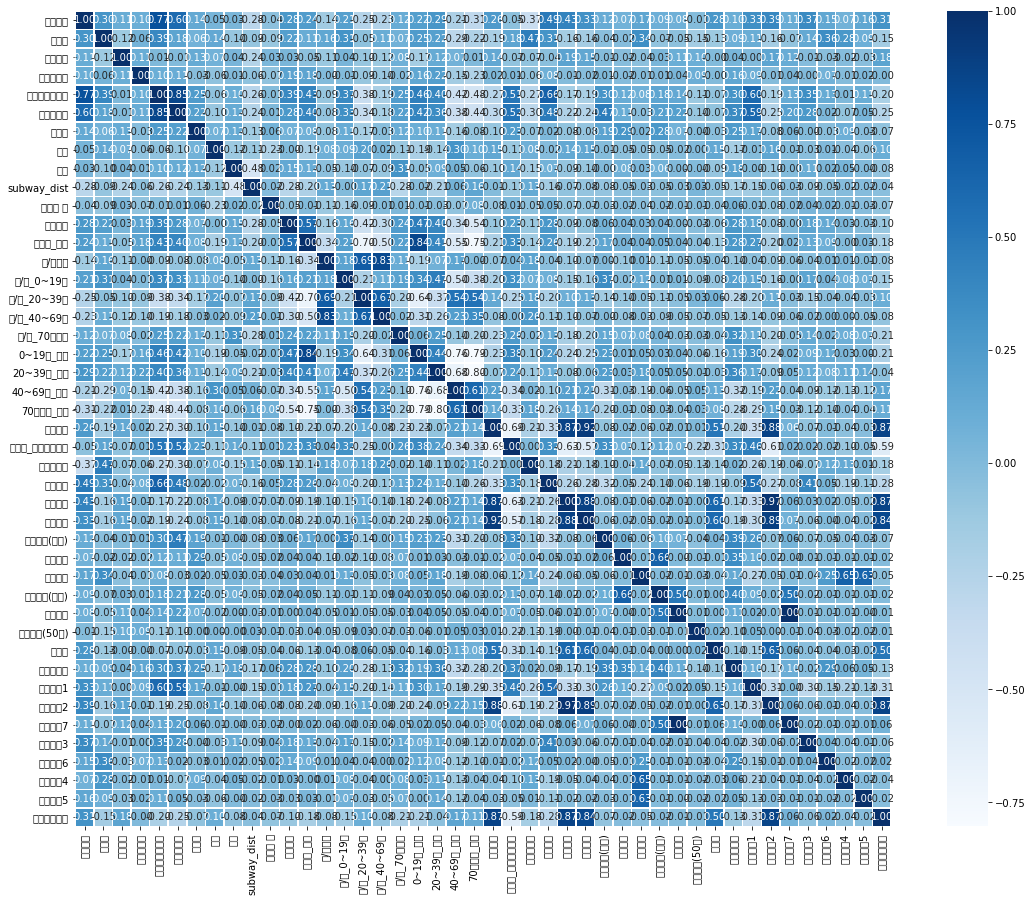

In [184]:
plt.subplots(figsize=(20,15))
sns.heatmap(X_cor.corr(), cbar = True, annot = True, fmt = '.2f', square = True, cmap = 'Blues', linewidths=.5)

### correlation 너무 높은 변수: 
- 영구임대&자격유형2 
- 임대상가&상가비율<br>

자격유형2랑 임대상가 drop

# Modeling

In [185]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
# from xgboost import XGBRegressor
from catboost import CatBoostRegressor
# import lightgbm as LGB
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from statsmodels.api import OLS

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
standardScaler = StandardScaler()
minMaxScaler = MinMaxScaler()
#standardScaler.fit(X_train)
#X_train = standardScaler.transform(X_train)
#standardScaler.fit(X_test)
#X_test = standardScaler.transform(X_test)

# Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

## 나눠서 modeling

In [186]:
pd.concat([pd.DataFrame(data.단지내주차면수.describe()),
           pd.DataFrame(dat.단지내주차면수.describe())], axis=1)

단지내주차면수      단지내주차면수
count   414.000000   147.000000
mean    586.330918   558.387755
std     363.665625   321.009953
min      13.000000    29.000000
25%     318.250000   313.000000
50%     517.000000   499.000000
75%     785.750000   726.000000
max    1798.000000  1696.000000

In [187]:
data = data.drop([ '자격유형4','자격유형2','자격유형7','자격유형1','자격유형6', '자격유형5','자격유형3'],axis=1)
dat = dat.drop([ '자격유형4','자격유형2','자격유형7','자격유형1','자격유형6', '자격유형5','자격유형3'],axis=1)



In [188]:
train1=data[data.단지내주차면수<785]
train2=data[data.단지내주차면수>=785]
test1=dat[dat.단지내주차면수<785]
test2=dat[dat.단지내주차면수>=785]

In [189]:
sum(data.단지내주차면수<876),sum(data.단지내주차면수>=876)

(330, 84)

In [190]:
print(train1.shape, train2.shape)
print(test1.shape, test2.shape)

(310, 42) (104, 42)
(113, 39) (34, 39)


In [191]:
def fit(X_train, X_test, y_train, y_test, model):
    try:
        model.fit(X_train, y_train,verbose=False)
    except:
        model.fit(X_train, y_train)
    tst_pred = model.predict(X_test)
    error = mean_absolute_error(y_test,tst_pred)
    return model, tst_pred, error


def fit_models(X, y, models, cv=False):
    X = np.array(X.reset_index(drop=True))
    y = np.array(y.reset_index(drop=True))
    best_error = 10000
    best_tst_pred = 0
    best_model = ""
    if cv==False:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True,random_state=2021)
        for m in models:
            model, tst_pred, error = fit(X_train, X_test, y_train, y_test, m)
            if best_error > error:
                best_error = error
                best_tst_pred = tst_pred
                best_model = model
    else:
        best_tst_idx = []
        kf = KFold(n_splits = 5, shuffle=True,random_state = 2021)
        for m in models:
            print(m)
            mae = []
            pred= []
            tst_idx = []
            for train_index, test_index in kf.split(X, y):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                scaler = StandardScaler().fit(X_train)
                X_train = scaler.transform(X_train)
                X_test = scaler.transform(X_test)
                model, tst_pred, error = fit(X_train, X_test, y_train, y_test, m)
                mae.append(error)
                pred.append(tst_pred.tolist())
                tst_idx.append(test_index.tolist())
            cv_error = np.mean(mae)
            print(f"model:{str(m).split('(')[0]}\nMAE:{cv_error}")
            if best_error > cv_error:
                best_error = cv_error
                best_tst_pred = pred
                best_tst_idx = sum(tst_idx, [])
                best_model = model
        best_tst_pred = sum(best_tst_pred,[])
        best_tst_pred = dict(zip(best_tst_idx,best_tst_pred))
    try:
        best_model = best_model.fit(np.concatenate((X_train, X_test),axis=0), 
                                                np.concatenate((y_train, y_test),axis=0), 
                                                verbose=False)
    except:
        best_model = best_model.fit(np.concatenate((X_train, X_test),axis=0), 
                                        np.concatenate((y_train, y_test),axis=0))
    return best_model, best_tst_pred, best_error

In [192]:
X1.columns

Index(['총세대수', '공가수', '지하철역', '버스정류장', '단지내주차면수', '연면적', '위도', '경도',
       'subway_dist', '환승역 수', '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세',
       '남/여_20~39세', '남/여_40~69세', '남/여_70세이상', '0~19세_비율', '20~39세_비율',
       '40~69세_비율', '70세이상_비율', '상가비율', '세대당_가능주차면수', '공가수비율', '국민임대', '영구임대',
       '공공임대(단기)', '장기전세', '행복주택', '공공임대(분납)', '공공분양', '공공임대(50년)', '임대료',
       '임대보증금', '자격유형3', '대형전용면적', '지역_경기도', '지역_경상남도', '지역_경상북도', '지역_광주광역시',
       '지역_대구광역시', '지역_대전광역시', '지역_부산광역시', '지역_서울특별시', '지역_울산광역시', '지역_전라남도',
       '지역_전라북도', '지역_제주특별자치도', '지역_충청남도', '지역_충청북도'],
      dtype='object')

In [193]:
models = [LinearRegression() ,
          PLSRegression(), 
          Ridge(random_state=2021),
          Lasso(random_state=2021), 
          ElasticNet(random_state=2021),
          #SVR(),
          CatBoostRegressor(random_state=2021, loss_function = 'MAE'),
          RandomForestRegressor(criterion="mae",random_state=2021),
          GradientBoostingRegressor(criterion="mae",random_state=2021)
          #XGBRegressor(random_state=2021)
         ]

In [194]:
X1 = train1.drop(columns=['단지명','단지코드','도로명주소','subway_name',
                         '등록차량수', "임대상가"])
X1 = pd.get_dummies(X1, drop_first=True)
y1=train1["등록차량수"]

In [195]:
X1.shape

(310, 49)

In [196]:
best_model1, best_tst_pred1, best_error1 = fit_models(X1, y1, models, cv=True)
best_model1,  best_error1

LinearRegression()
model:LinearRegression
MAE:452686047074088.3
PLSRegression()
model:PLSRegression
MAE:102.45594186733744
Ridge(random_state=2021)
model:Ridge
MAE:99.25368875564801
Lasso(random_state=2021)
model:Lasso
MAE:97.38491258389375
ElasticNet(random_state=2021)
model:ElasticNet
MAE:100.83683478548757
model:<catboost.core.CatBoostRegressor object at 0x7fcfe0265ca0>
MAE:93.84244378514599
RandomForestRegressor(criterion='mae', random_state=2021)
model:RandomForestRegressor
MAE:99.87308064516128
GradientBoostingRegressor(criterion='mae', random_state=2021)
model:GradientBoostingRegressor
MAE:100.4607253964057


(<catboost.core.CatBoostRegressor at 0x7fcfe0265ca0>, 93.84244378514599)

In [125]:
#best_tst_pred1

In [197]:
models = [LinearRegression() ,
          PLSRegression(), 
          Ridge(random_state=2021),
          Lasso(random_state=2021), 
#           ElasticNet(random_state=2021),
          #SVR(),
          CatBoostRegressor(random_state=2021, loss_function = 'MAE'),
          RandomForestRegressor(criterion="mae",random_state=2021),
          GradientBoostingRegressor(criterion="mae",random_state=2021)
          #XGBRegressor(random_state=2021)
         ]

In [198]:
X2=train2.drop(columns=['단지명','단지코드','도로명주소','subway_name',
                         '등록차량수', "임대상가"])
X2 = pd.get_dummies(X2, drop_first=True)
y2=train2["등록차량수"]

In [199]:
best_model2, best_tst_pred2, best_error2=fit_models(X2, y2, models, cv=True)
best_model2, best_error2

LinearRegression()
model:LinearRegression
MAE:4423761088505716.0
PLSRegression()
model:PLSRegression
MAE:238.90271908584177
Ridge(random_state=2021)
model:Ridge
MAE:253.12910780616144
Lasso(random_state=2021)
model:Lasso
MAE:253.62366720468808
model:<catboost.core.CatBoostRegressor object at 0x7fd0007cf0d0>
MAE:220.89589344757695
RandomForestRegressor(criterion='mae', random_state=2021)
model:RandomForestRegressor
MAE:229.64864285714285
GradientBoostingRegressor(criterion='mae', random_state=2021)
model:GradientBoostingRegressor
MAE:253.75049192259092


(<catboost.core.CatBoostRegressor at 0x7fd0007cf0d0>, 220.89589344757695)

In [200]:
tst_pred1 = pd.merge(pd.DataFrame(best_tst_pred1,index=[0]).T.reset_index(),
         pd.DataFrame(train1[["단지코드","단지내주차면수"]].reset_index(drop=True)).reset_index(),
         on="index")

tst_pred2 = pd.merge(pd.DataFrame(best_tst_pred2,index=[0]).T.reset_index(),
         pd.DataFrame(train2[["단지코드","단지내주차면수"]].reset_index(drop=True)).reset_index(),
         on="index")

In [130]:
tst_pred1 = pd.merge(tst_pred1, pd.concat([train1.단지코드,y1],axis=1), on = "단지코드")
tst_pred2 = pd.merge(tst_pred2, pd.concat([train2.단지코드,y2],axis=1), on = "단지코드")

In [131]:
tst_pred1

index           0   단지코드  단지내주차면수  등록차량수
0        1  644.172663  C1945    734.0  730.0
1        2  528.878653  C1470    645.0  553.0
2        6  653.783300  C2513    530.0  820.0
3        8  580.794416  C2049    631.0  841.0
4        9  216.097836  C2202    222.0  226.0
..     ...         ...    ...      ...    ...
305    280  438.595312  C2359    629.0  693.0
306    281  239.547106  C2139    232.0  155.0
307    289  150.864964  C2154    131.0  124.0
308    299  195.592840  C1732    188.0  267.0
309    303  283.479958  C2153    345.0  280.0

[310 rows x 5 columns]

In [63]:
q = list(tst_pred1["단지내주차면수"].quantile([0,.2,.4,.6,.8,1]))
q

[13.0, 229.4, 359.20000000000005, 474.0, 615.2, 779.0]

In [64]:
q2 = list(tst_pred2["단지내주차면수"].quantile([0,.2,.4,.6,.8,1]))
q2

[788.0, 876.6, 950.2, 1065.0, 1289.4, 1798.0]

In [132]:
q = list(tst_pred1["단지내주차면수"].quantile([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]))
q

[13.0,
 161.3,
 229.4,
 290.1,
 359.20000000000005,
 404.5,
 474.0,
 530.0,
 615.2,
 698.2,
 779.0]

In [133]:
q2 = list(tst_pred2["단지내주차면수"].quantile([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]))
q2

[788.0,
 834.9,
 876.6,
 902.6999999999999,
 950.2,
 987.0,
 1065.0,
 1156.1999999999998,
 1289.4,
 1525.3,
 1798.0]

In [65]:
tst_pred1[0]

0      644.172663
1      528.878653
2      653.783300
3      580.794416
4      216.097836
          ...    
305    438.595312
306    239.547106
307    150.864964
308    195.592840
309    283.479958
Name: 0, Length: 310, dtype: float64

In [134]:
tst_pred1["realclass"] = [99]*len(tst_pred1)
for i in range(len(q[:-1])):
    tst_pred1.loc[(tst_pred1.등록차량수>=q[i])&(tst_pred1.등록차량수<q[i+1]),"realclass"] = i
tst_pred1.loc[tst_pred1.등록차량수==q[5],"realclass"] = 4

tst_pred1["predclass"] = [99]*len(tst_pred1)
for i in range(len(q[:-1])):
    tst_pred1.loc[(tst_pred1[0]>=q[i])&(tst_pred1[0]<q[i+1]),"predclass"] = i
tst_pred1.loc[tst_pred1[0]==q[5],"predclass"] = 4

In [135]:
tst_pred2["realclass"] = [99]*len(tst_pred2)
for i in range(len(q2[:-1])):
    tst_pred2.loc[(tst_pred2.등록차량수>=q2[i])&(tst_pred2.등록차량수<q2[i+1]),"realclass"] = i
tst_pred2.loc[tst_pred2.등록차량수==q2[5],"realclass"] = 4

tst_pred2["predclass"] = [99]*len(tst_pred2)
for i in range(len(q2[:-1])):
    tst_pred2.loc[(tst_pred2[0]>=q2[i])&(tst_pred2[0]<q2[i+1]),"predclass"] = i
tst_pred2.loc[tst_pred1[0]==q2[5],"predclass"] = 4

In [137]:
print(q)
print(q2)

[13.0, 161.3, 229.4, 290.1, 359.20000000000005, 404.5, 474.0, 530.0, 615.2, 698.2, 779.0]
[788.0, 834.9, 876.6, 902.6999999999999, 950.2, 987.0, 1065.0, 1156.1999999999998, 1289.4, 1525.3, 1798.0]


In [136]:
from sklearn.metrics import confusion_matrix as cm 
print(cm(tst_pred1.realclass,tst_pred1.predclass))
print(cm(tst_pred2.realclass,tst_pred2.predclass))



[[28 10  6  2  2  1  1  1  0  0  0]
 [ 5  5  8  1  0  2  0  1  0  0  0]
 [ 0  6  6  7  4  5  0  1  1  0  0]
 [ 1  1 12 11  2  5  1  2  1  0  0]
 [ 1  0  1  3  5  3  3  2  0  0  0]
 [ 0  0  1  3  6  9  5  3  1  0  0]
 [ 0  0  0  2  2  5 11  9  2  0  0]
 [ 0  0  0  0  0  7  9 10  5  2  1]
 [ 0  1  0  0  1  2  2  9  6  1  0]
 [ 0  0  0  0  0  1  1  2 10  2  0]
 [ 0  0  0  0  0  1  2  3 10  6  0]]
[[1 2 0 3 1 1 0 1 0 0 1]
 [1 1 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0]
 [1 2 0 0 0 2 0 1 0 0 0]
 [0 0 0 0 2 1 0 2 0 0 0]
 [0 0 0 1 1 2 1 2 1 0 0]
 [2 1 0 3 1 1 0 0 0 0 1]
 [2 1 0 0 2 2 1 2 0 0 0]
 [0 0 0 0 0 1 0 4 4 0 0]
 [0 0 0 0 1 1 0 1 3 0 0]
 [5 5 1 4 2 5 2 1 2 2 6]]


In [68]:
from sklearn.metrics import confusion_matrix as cm 
print(cm(tst_pred1.realclass,tst_pred1.predclass))
print(cm(tst_pred2.realclass,tst_pred2.predclass))



[[48 17  5  3  0  0]
 [ 8 36 16  4  2  0]
 [ 1  8 23 13  1  0]
 [ 0  2 14 39  9  1]
 [ 1  0  4 14 19  0]
 [ 0  0  1  5 16  0]]
[[ 5  3  3  2  0  1]
 [ 3  0  3  2  0  0]
 [ 0  1  6  5  1  0]
 [ 6  3  6  3  0  1]
 [ 0  0  3  5  7  0]
 [10  5  7  3  4  6]]


In [70]:
pd.set_option('display.max_columns', None)
data.describe()

총세대수         공가수        지하철역       버스정류장      단지내주차면수  \
count   414.000000  414.000000  414.000000  414.000000   414.000000   
mean    724.669082   13.446860    0.142512    3.705314   586.330918   
std     407.805002   10.326431    0.401546    2.826735   363.665625   
min      26.000000    0.000000    0.000000    0.000000    13.000000   
25%     450.250000    5.000000    0.000000    2.000000   318.250000   
50%     633.500000   13.000000    0.000000    3.000000   517.000000   
75%     923.500000   20.000000    0.000000    4.000000   785.750000   
max    2568.000000   55.000000    3.000000   20.000000  1798.000000   

             등록차량수           연면적          위도          경도  subway_dist  \
count   414.000000    414.000000  414.000000  414.000000   414.000000   
mean    570.103865   3727.244858  127.702738   36.212453     0.261004   
std     391.585826   4819.394460    0.845181    1.121667     0.361569   
min      13.000000      5.688000  126.266160   33.249796     0.000582   
25%     289.250000    214.847500  127.051385   35.243825     0.019123   
50%     505.000000   3126.412941  127.444874   36.224465     0.086563   
75%     760.000000   5894.521750  128.504449   37.310355     0.387130   
max    2550.000000  53027.300800  129.395858   38.202292     1.890024   

            환승역 수           총인구수      세대당_인구       남/여비율   남/여_0~19세  \
count  414.000000     414.000000  414.000000  414.000000  414.000000   
mean     1.082126   31083.809362    2.295639    0.997621    1.991845   
std      0.274888   21485.568140    0.260432    0.061646    0.266616   
min      1.000000    1706.000000    1.590000    0.870000    1.261745   
25%      1.000000   15437.500000    2.110000    0.960000    1.799299   
50%      1.000000   25625.500000    2.300000    0.985000    1.948085   
75%      1.000000   40087.875000    2.500000    1.020000    2.126401   
max      2.000000  120892.000000    2.893333    1.450000    2.998348   

       남/여_20~39세  남/여_40~69세   남/여_70세이상    0~19세_비율   20~39세_비율   40~69세_비율  \
count  414.000000  414.000000  414.000000  414.000000  414.000000  414.000000   
mean     1.113837    1.007274    0.684006    0.190388    0.248159    0.456547   
std      0.147256    0.089715    0.065409    0.049290    0.045748    0.035291   
min      0.872700    0.858996    0.495540    0.059441    0.097250    0.356219   
25%      1.006899    0.946061    0.637480    0.161071    0.216999    0.435452   
50%      1.097635    0.990066    0.680200    0.194873    0.252235    0.456830   
75%      1.186334    1.046629    0.730948    0.222675    0.280746    0.479756   
max      2.238250    1.637255    0.847594    0.298959    0.398032    0.548345   

         70세이상_비율        상가비율  세대당_가능주차면수       공가수비율         국민임대  \
count  414.000000  414.000000  414.000000  414.000000   414.000000   
mean     0.104906    0.051366    0.816251    0.023103   505.294686   
std      0.054141    0.184718    0.241787    0.021664   423.152976   
min      0.023169    0.000000    0.109155    0.000000     0.000000   
25%      0.067985    0.000000    0.718561    0.008069     0.000000   
50%      0.094840    0.000000    0.849940    0.018163   475.500000   
75%      0.131808    0.000000    0.952844    0.031441   774.500000   
max      0.372299    0.882353    1.544944    0.175000  2334.000000   

              영구임대        임대상가     공공임대(단기)        장기전세         행복주택  \
count   414.000000  414.000000   414.000000  414.000000   414.000000   
mean     87.712560    0.690821    58.374396    1.497585    40.992754   
std     308.547573    2.991685   212.574539   21.921691   199.703951   
min       0.000000    0.000000     0.000000    0.000000     0.000000   
25%       0.000000    0.000000     0.000000    0.000000     0.000000   
50%       0.000000    0.000000     0.000000    0.000000     0.000000   
75%       0.000000    0.000000     0.000000    0.000000     0.000000   
max    2385.000000   27.000000  1444.000000  370.000000  2200.000000   

         공공임대(분납)        공공분양   공공임대(50년)           임대료  

In [362]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수', '등록차량수', '단지명', '도로명주소',
       '연면적', '위도', '경도', 'subway_name', 'subway_dist', '환승역 수', '총인구수',
       '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세', '남/여_70세이상',
       '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', '상가비율', '세대당_가능주차면수',
       '공가수비율', '대형전용면적', '자격유형_카테고리'],
      dtype='object')

In [363]:
train.loc[train.지역 == "제주특별자치도","환승역 수"]

422     1
423     1
424     1
450     1
451     1
       ..
2557    1
2558    1
2559    1
2560    1
2561    1
Name: 환승역 수, Length: 69, dtype: int64

- 은영이의 최고 코드로 예측했을때 
- 단지내주차면수가 작은 그룹에서.. 단지내주차면수

In [ ]:
model_1=CatBoostRegressor(random_state=2021, verbose=False).fit(X_train1, y_train1)
model1_pred = model_1.predict(X_test1)

In [ ]:
best_tst_pred1

In [ ]:
#best_model2, best_tst_pred2, best_error2

In [ ]:
X1 = train1.drop(columns=['단지명','단지코드','도로명주소','subway_name',
                         '등록차량수', "임대상가",
                           "자격유형1","자격유형2","자격유형3","자격유형4","자격유형5","자격유형6","자격유형7"
                         ])
X1 = pd.get_dummies(X1, drop_first=True)
y1=train1["등록차량수"]

In [ ]:
best_model_1, best_tst_pred_1, best_error_1 = fit_models(X1, y1, models, cv=True)

In [ ]:
#best_tst_pred_1

In [ ]:
X2=train2.drop(columns=['단지명','단지코드','도로명주소','subway_name',
                         '등록차량수', "임대상가",
                       "자격유형1","자격유형2","자격유형3","자격유형4","자격유형5","자격유형6","자격유형7"])
X2 = pd.get_dummies(X2, drop_first=True)
y2=train2["등록차량수"]

In [ ]:
best_model_2, best_tst_pred_2, best_error_2=fit_models(X2, y2, models, cv=True)

In [ ]:
#best_tst_pred_2

In [ ]:
기존=pd.merge(pd.DataFrame(best_tst_pred1,index=[0]).T.reset_index(),
         pd.DataFrame(train1.단지코드.reset_index(drop=True)).reset_index(),
         on="index")

In [ ]:
자격유형드랍=pd.merge(pd.DataFrame(best_tst_pred_1,index=[0]).T.reset_index(),
         pd.DataFrame(train1.단지코드.reset_index(drop=True)).reset_index(),
         on="index")

In [ ]:
df=pd.merge(기존, 자격유형드랍, on="단지코드", how='inner')

In [ ]:
df.columns

In [ ]:
df=df.drop(columns=["index_x", "index_y"])

In [ ]:
df=pd.merge(df, train1[["단지코드", "등록차량수"]], on="단지코드", how="inner")

In [ ]:
df.columns=['pred_기본', '단지코드', 'pred_자격유형x', 'real_Y']

In [ ]:
df=df[['단지코드', 'pred_기본', 'pred_자격유형x', 'real_Y']]

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
#df

In [ ]:
df["diff"]=abs(df.pred_기본-df.pred_자격유형x)

In [ ]:
#df.sort_values("diff")

In [ ]:
#train1[train1.상가비율>=0.7][["단지코드", "지역", "등록차량수", "단지내주차면수", "총세대수"]]

In [ ]:
#train[train.단지코드=="C1616"][["단지코드","총세대수", "단지내주차면수", "등록차량수", "세대당_인구", "상가비율"]]

In [ ]:
기존=pd.merge(pd.DataFrame(best_tst_pred2,index=[0]).T.reset_index(),
         pd.DataFrame(train2.단지코드.reset_index(drop=True)).reset_index(),
         on="index")
자격유형드랍=pd.merge(pd.DataFrame(best_tst_pred_2,index=[0]).T.reset_index(),
         pd.DataFrame(train2.단지코드.reset_index(drop=True)).reset_index(),
         on="index")

df2=pd.merge(기존, 자격유형드랍, on="단지코드", how='inner')
df2=df2.drop(columns=["index_x", "index_y"])

df2=pd.merge(df2, train2[["단지코드", "등록차량수"]], on="단지코드", how="inner")
df2.columns=['pred_기본', '단지코드', 'pred_자격유형x', 'real_Y']
df2=df2[['단지코드', 'pred_기본', 'pred_자격유형x', 'real_Y']]

In [ ]:
#df2

In [ ]:
df2["diff"]=abs(df2.pred_기본-df2.pred_자격유형x)

In [ ]:
df2.sort_values("diff")

In [ ]:
print(best_error1, best_error_1)
print(best_error2, best_error_2)

In [ ]:
#df.to_csv("785미만.csv", index=False)
#df2.to_csv("785이상.csv", index=False)

# 나눠서 예측

In [ ]:
sample=pd.read_csv('sample_submission.csv')
sample.head()

In [ ]:
sample.shape

In [ ]:
train1=data[data.단지내주차면수<785]
train2=data[data.단지내주차면수>=785]
test1=dat[dat.단지내주차면수<785]
test2=dat[dat.단지내주차면수>=785]

In [ ]:
print(train1.shape, train2.shape)
print(test1.shape, test2.shape)

In [ ]:
df= pd.concat([train1, test1])

In [ ]:
X = df.drop(columns=['단지명','단지코드','도로명주소','subway_name',
                         '등록차량수', "임대상가", 
                     "자격유형1","자격유형2","자격유형3","자격유형4","자격유형5","자격유형6","자격유형7"])
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train1=X.iloc[0:310, :]
X_test1=X.iloc[310:, :]
y_train1 = train1[['등록차량수']]

In [ ]:
#X.test["장기전세"]=0
#X.test["공공분양"]=0

In [ ]:
model_1=CatBoostRegressor(random_state=2021, verbose=False).fit(X_train1, y_train1)
model1_pred = model_1.predict(X_test1)

In [ ]:
model1=pd.DataFrame(model1_pred)
code1=test1.단지코드
model1=model1.reset_index(drop=True)
code1=code1.reset_index(drop=True)

In [ ]:
pred1=pd.concat([code1, model1], axis=1, ignore_index=True)
pred1.columns=["code", "num"]
pred1.head()

In [ ]:
df= pd.concat([train2, test2])

In [ ]:
X = df.drop(columns=['단지명','단지코드','도로명주소','subway_name',
                         '등록차량수', "임대상가",
                    "자격유형1","자격유형2","자격유형3","자격유형4","자격유형5","자격유형6","자격유형7"])
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train2=X.iloc[0:104, :]
X_test2=X.iloc[104:, :]
y_train2 = train2[['등록차량수']]

In [ ]:
#X.test["장기전세"]=0
#X.test["공공분양"]=0

In [ ]:
model_2= CatBoostRegressor(random_state=2021, verbose=False).fit(X_train2, y_train2)
model2_pred = model_2.predict(X_test2)

In [ ]:
model2=pd.DataFrame(model2_pred)
code2=test2.단지코드
model2=model2.reset_index(drop=True)
code2=code2.reset_index(drop=True)

In [ ]:
pred2=pd.concat([code2, model2], axis=1, ignore_index=True)
pred2.columns=["code", "num"]
pred2.head()

In [ ]:
df_merge=pd.DataFrame(pd.concat([pred1, pred2], axis=0))
df_merge=df_merge.reset_index(drop=True)

In [ ]:
df_merge.head()

In [ ]:
test_split=pd.merge(sample, df_merge, on='code', how='outer')

In [ ]:
test_split.head()

In [ ]:
test_split= test_split.drop(columns='num_x')
test_split.columns=["code","num"]

In [ ]:
test_split[test_split.num<=0].index

In [ ]:
one=pd.read_csv("0719_1.csv")
one = one.loc[~one.code.isin(['C2335', 'C1327', 'C2675'])]
test_= test_split.loc[~test_split.code.isin(['C2335', 'C1327', 'C2675'])]
round(mean_absolute_error(one.num, test_.num))

In [ ]:
#test_split.to_csv('0719_1.csv', index=False)

In [ ]:
plt.subplots(figsize=(17,15))
sorted_feature_importance = model_1.feature_importances_.argsort()
plt.barh(X_test1.columns[sorted_feature_importance], 
        model_1.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost1 Feature Importance")

In [ ]:
plt.subplots(figsize=(17,15))
sorted_feature_importance = model_2.feature_importances_.argsort()
plt.barh(X_test2.columns[sorted_feature_importance], 
        model_2.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost2 Feature Importance")